In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# First Year

In [4]:
# Import dataset

bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx',header=[1,2])  # Assuming your file has multi-level headers
print(bsc1)

     Student_Details                                           \
              RollNo   EnrolNo Part1Total GrandTotal   Result   
0            2202001  U2112626        214        214  Elig/SE   
1            2202002  U2112395        132        132   Failed   
2            2202003  U2112367        200        200   Passed   
3            2202004  U2112016         AA         AA   Absent   
4            2202005  U2112649         AA         AA   Absent   
...              ...       ...        ...        ...      ...   
3312         2206715  I2110715        100        100   Failed   
3313         2206716  I2110716        115        115   Failed   
3314         2206717  I2110717        249        249   Passed   
3315         2206718  I2110719         AA         AA   Absent   
3316         2206719  I2110718        241        241   Passed   

                                              Physics                 \
     Mechanics and Special Theory of Relativity S.T.R Thermal Phyics   
0         

In [5]:
# Make subject combinations in form of dictionary
subject_combinations = {
    "PMC": ["Physics", "Mathematics", "Chemistry"],
    "PMComp": ["Physics", "Mathematics", "Computer Science"],
    "PMS": ["Physics", "Mathematics", "Statistics"],
    "PMDef": ["Physics", "Mathematics", "Defence Studies"],
    "PMG": ["Physics", "Mathematics", "Geology"],
    "PMGeo": ["Physics", "Mathematics", "Geography"],
    "MCompPsy": ["Mathematics", "Computer Science", "Psychology"],
    "ZBC": ["Zoology", "Botany", "Chemistry"],
    "ZBDef": ["Zoology", "Botany", "Defence Studies"],
    "ZChemBio": ["Zoology", "Chemistry", "Bio-Chemistry"],
    "ZBA": ["Zoology", "Botany", "Anthropology"],
    "BCB": ["Botany", "Chemistry", "Bio-Chemistry"]
}


In [18]:
import pandas as pd


bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx', header=[1, 2])
total=0
# Iterate through each student
for index, row in bsc1.iterrows():
    present_subjects = set()  # Subjects with at least one valid (non-NaN, not '--', not 'AA') subheading

    for subject, subheading in bsc1.columns:
        value = row[(subject, subheading)]

        # Check if the value is valid: not NaN, not '--', and not 'AA'
        if subject !="Student_Details" and pd.notna(value) and str(value).strip() not in ['0','UFM','--', 'AA']:
            present_subjects.add(subject)
            

    print(f"Student {index + 1} has valid marks in subjects: {present_subjects}")



Student 1 has valid marks in subjects: {'Mathematics', 'Physics', 'Statistics'}
Student 2 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 3 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 4 has valid marks in subjects: set()
Student 5 has valid marks in subjects: set()
Student 6 has valid marks in subjects: set()
Student 7 has valid marks in subjects: set()
Student 8 has valid marks in subjects: {'Mathematics', 'Physics'}
Student 9 has valid marks in subjects: {'Mathematics', 'Physics', 'Geography'}
Student 10 has valid marks in subjects: {'Botany', 'Zoology', 'Chemistry'}
Student 11 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 12 has valid marks in subjects: {'Mathematics', 'Physics', 'Computer Science'}
Student 13 has valid marks in subjects: {'Mathematics', 'Physics', 'Geography'}
Student 14 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 15 has valid marks in subje

In [19]:
import pandas as pd
import datetime

# Load your dataset
bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx', header=[1, 2])
sum_of_subs = {}
count_of_subs = {}
total_stud = 0

# Iterate through each student
for index, row in bsc1.iterrows():
    present_subjects = set()
    total_marks = 0
    count=0

    for subject, subheading in bsc1.columns:
        value = row[(subject, subheading)]

        if subject != "Student_Details" and pd.notna(value) and str(value).strip() not in ['0','UFM' ,'--', 'AA']:
            present_subjects.add(subject)

            # Try converting value to float and add to total
            try:
                if not isinstance(value, (datetime.date, datetime.datetime)):
                    total_marks += float(value)
                    

            except ValueError:
                pass  # Ignore if conversion to number fails

        
    if len(present_subjects) == 3:
        key = tuple(sorted(present_subjects))
        total_stud +=1

        # Initialize if not exists
        if key not in sum_of_subs:
            sum_of_subs[key] = 0
            count_of_subs[key] = 0

        sum_of_subs[key] += total_marks
        count_of_subs[key] += 1

# print(sum_of_subs)

for key,value in sum_of_subs.items():
    print(f"{key}:{value}")

print("\n\n")
for key,value in count_of_subs.items():
    print(f"{key}:{value}")

print(total_stud)

('Mathematics', 'Physics', 'Statistics'):28185.0
('Chemistry', 'Mathematics', 'Physics'):158674.0
('Geography', 'Mathematics', 'Physics'):6553.0
('Botany', 'Chemistry', 'Zoology'):194413.0
('Computer Science', 'Mathematics', 'Physics'):67263.0
('Defence Studies', 'Mathematics', 'Physics'):35343.0
('Computer Science', 'Mathematics', 'Psychology'):7037.0
('Geology', 'Mathematics', 'Physics'):5990.0
('Anthropology', 'Botany', 'Zoology'):3666.0
('Biochemistry', 'Chemistry', 'Zoology'):10468.0
('Botany', 'Defence Studies', 'Zoology'):7854.0
('Biochemistry', 'Botany', 'Chemistry'):4714.0



('Mathematics', 'Physics', 'Statistics'):147
('Chemistry', 'Mathematics', 'Physics'):756
('Geography', 'Mathematics', 'Physics'):27
('Botany', 'Chemistry', 'Zoology'):960
('Computer Science', 'Mathematics', 'Physics'):344
('Defence Studies', 'Mathematics', 'Physics'):188
('Computer Science', 'Mathematics', 'Psychology'):30
('Geology', 'Mathematics', 'Physics'):24
('Anthropology', 'Botany', 'Zoology'):13
(

In [ ]:
import pandas as pd

# Create a list to store rows of the result
results = []

# Loop through the keys (which are subject combinations)
for key in sum_of_subs:
    total = sum_of_subs[key]
    count = count_of_subs[key]
    
    # Pad with empty strings if less than 3 subjects (just in case)
    subjects = list(key) + [""] * (3 - len(key))
    
    results.append({
        "Subject 1": subjects[0],
        "Subject 2": subjects[1],
        "Subject 3": subjects[2],
        "Total Marks": total,
        "Count": count
    })

# Create a DataFrame
df_results = pd.DataFrame(results)

# Save to Excel
df_results.to_excel("SubjectCombinationResults.xlsx", index=False)

#print("Results saved to 'SubjectCombinationResults.xlsx'")

In [5]:
# For university students only  ----> Not needed in this , Just want to check total number of students in university which are Pass/Fail
import pandas as pd
import datetime

# Load your dataset
bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx', header=[1, 2])
sum_of_subs = {}
count_of_subs = {}
total_stud = 0

# Iterate through each student
for index, row in bsc1.iterrows():
    present_subjects = set()
    total_marks = 0
    count=0

    flag = False

    for subject, subheading in bsc1.columns:
        value = row[(subject, subheading)]
        if subject == "Student_Details" and subheading == "EnrolNo" and str(value).startswith('U')==True:
            flag = True
            break

    for subject, subheading in bsc1.columns:
        value = row[(subject, subheading)]

        if subject != "Student_Details" and flag==True and pd.notna(value) and str(value).strip() not in ['0', '--','UFM' ,'AA']:
            present_subjects.add(subject)

            # Try converting value to float and add to total
            try:
                if not isinstance(value, (datetime.date, datetime.datetime)):
                    total_marks += float(value)
                    

            except ValueError:
                pass  # Ignore if conversion to number fails

        
    if len(present_subjects) == 3:
        key = tuple(sorted(present_subjects))
        total_stud +=1

        # Initialize if not exists
        if key not in sum_of_subs:
            sum_of_subs[key] = 0
            count_of_subs[key] = 0

        sum_of_subs[key] += total_marks
        count_of_subs[key] += 1

# print(sum_of_subs)

for key,value in sum_of_subs.items():
    print(f"{key}:{value}")

print("\n\n")
for key,value in count_of_subs.items():
    print(f"{key}:{value}")

print(total_stud)

('Mathematics', 'Physics', 'Statistics'):7873.0
('Chemistry', 'Mathematics', 'Physics'):66923.0
('Geography', 'Mathematics', 'Physics'):6553.0
('Botany', 'Chemistry', 'Zoology'):46618.0
('Computer Science', 'Mathematics', 'Physics'):11853.0
('Defence Studies', 'Mathematics', 'Physics'):8110.0
('Computer Science', 'Mathematics', 'Psychology'):7037.0
('Geology', 'Mathematics', 'Physics'):5990.0
('Anthropology', 'Botany', 'Zoology'):3666.0
('Biochemistry', 'Chemistry', 'Zoology'):5127.0
('Botany', 'Defence Studies', 'Zoology'):4858.0
('Biochemistry', 'Botany', 'Chemistry'):1983.0



('Mathematics', 'Physics', 'Statistics'):33
('Chemistry', 'Mathematics', 'Physics'):279
('Geography', 'Mathematics', 'Physics'):27
('Botany', 'Chemistry', 'Zoology'):185
('Computer Science', 'Mathematics', 'Physics'):46
('Defence Studies', 'Mathematics', 'Physics'):34
('Computer Science', 'Mathematics', 'Psychology'):30
('Geology', 'Mathematics', 'Physics'):24
('Anthropology', 'Botany', 'Zoology'):13
('Biochem

In [ ]:
import pandas as pd

# Create a list to store rows of the result
results = []

# Loop through the keys (which are subject combinations)
for key in sum_of_subs:
    total = sum_of_subs[key]
    count = count_of_subs[key]
    
    # Pad with empty strings if less than 3 subjects (just in case)
    subjects = list(key) + [""] * (3 - len(key))
    
    results.append({
        "Subject 1": subjects[0],
        "Subject 2": subjects[1],
        "Subject 3": subjects[2],
        "Total Marks": total,
        "Count": count
    })

# Create a DataFrame
df_results = pd.DataFrame(results)

# Save to Excel
df_results.to_excel("SubjectCombinationResults_FirstYear_Univ.xlsx", index=False)

#print("Results saved to 'SubjectCombinationResults.xlsx'")

In [4]:
univ_subject_avg = pd.read_excel('SubjectCombinationResults_FirstYear_Univ.xlsx',header=0)
univ_subject_avg

,Subject 1,Subject 2,Subject 3,Total Marks,Count,Average
0,Mathematics,Physics,Statistics,7873,33,238.575758
1,Chemistry,Mathematics,Physics,66923,279,239.867384
2,Geography,Mathematics,Physics,6553,27,242.703704
3,Botany,Chemistry,Zoology,46618,185,251.989189
4,Computer Science,Mathematics,Physics,11853,46,257.673913
5,Defence Studies,Mathematics,Physics,8110,34,238.529412
6,Computer Science,Mathematics,Psychology,7037,30,234.566667
7,Geology,Mathematics,Physics,5990,24,249.583333
8,Anthropology,Botany,Zoology,3666,13,282.000000
9,Biochemistry,Chemistry,Zoology,5127,18,284.833333


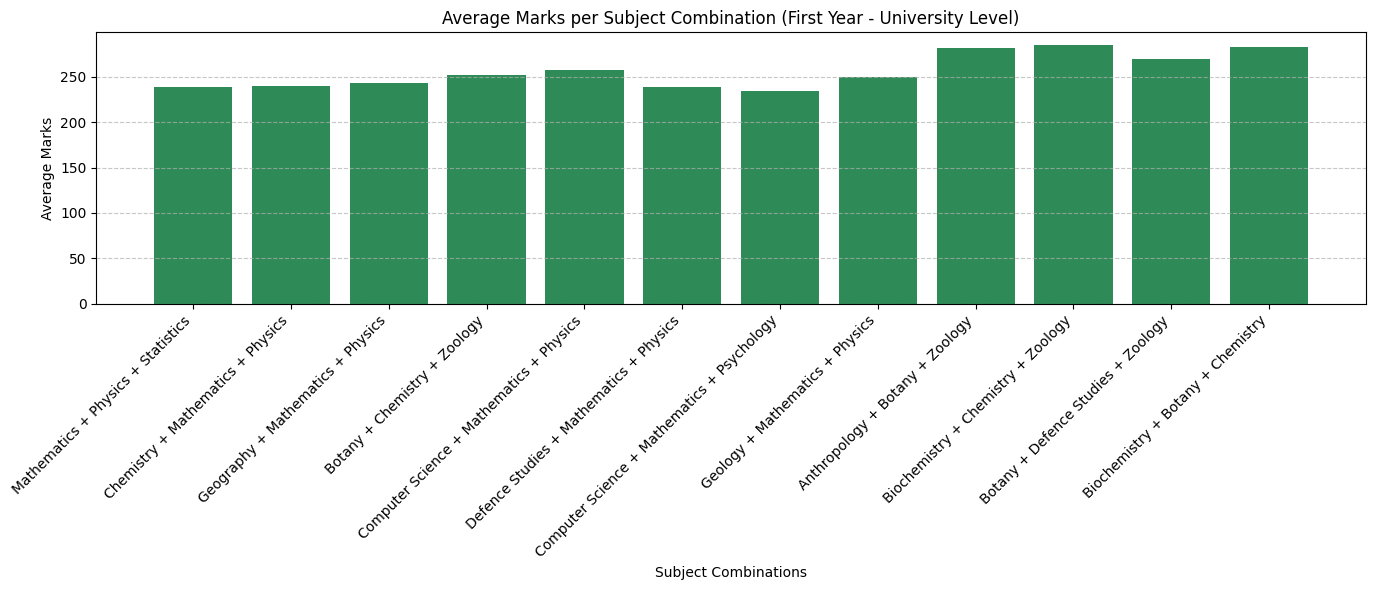

In [17]:
import matplotlib.pyplot as plt

# Create a new column for combined subject name
univ_subject_avg['Combination'] = (
    univ_subject_avg['Subject 1'] + ' + ' +
    univ_subject_avg['Subject 2'] + ' + ' +
    univ_subject_avg['Subject 3']
)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(univ_subject_avg['Combination'], univ_subject_avg['Average'], color='seagreen')

plt.xlabel('Subject Combinations')
plt.ylabel('Average Marks')
plt.title('Average Marks per Subject Combination (First Year - University Level)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
all_subject_avg = pd.read_excel('SubjectCombinationResults.xlsx',header=0)
all_subject_avg

,Subject 1,Subject 2,Subject 3,Total Marks,Count,Average
0,Mathematics,Physics,Statistics,28185,147,191.734694
1,Chemistry,Mathematics,Physics,158674,756,209.886243
2,Geography,Mathematics,Physics,6553,27,242.703704
3,Botany,Chemistry,Zoology,194413,960,202.513542
4,Computer Science,Mathematics,Physics,67263,344,195.531977
5,Defence Studies,Mathematics,Physics,35343,188,187.994681
6,Computer Science,Mathematics,Psychology,7037,30,234.566667
7,Geology,Mathematics,Physics,5990,24,249.583333
8,Anthropology,Botany,Zoology,3666,13,282.000000
9,Biochemistry,Chemistry,Zoology,10468,41,255.317073


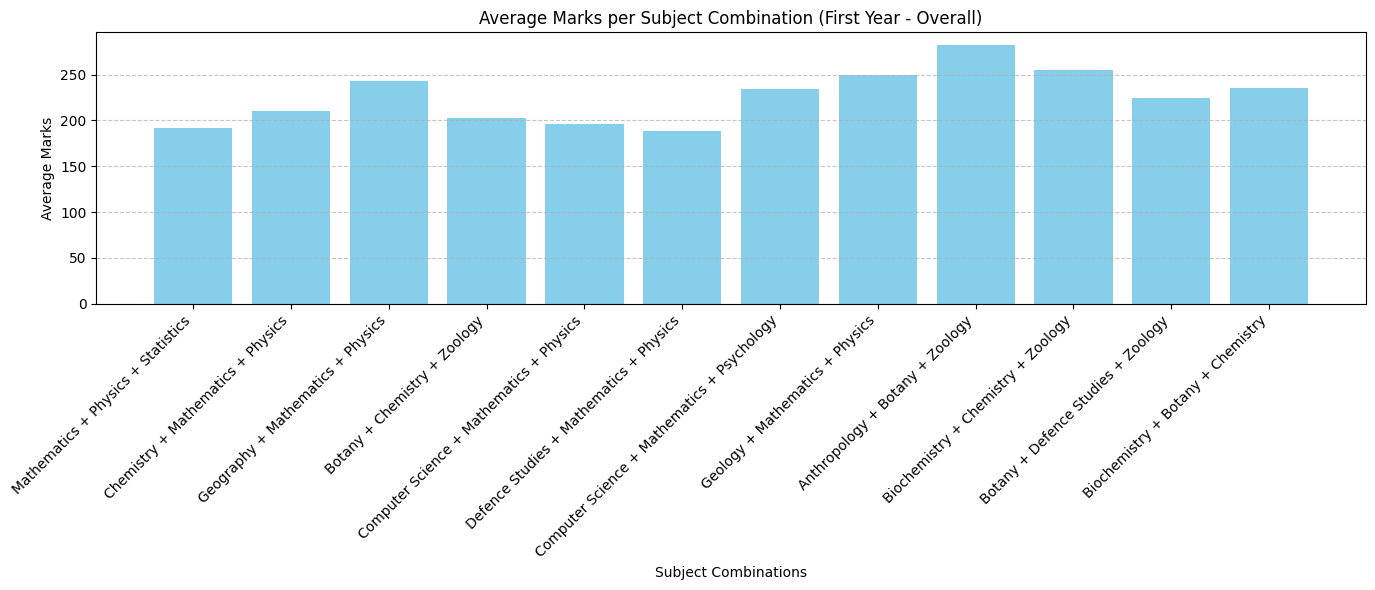

In [7]:
import matplotlib.pyplot as plt

# Create a new column for combined subject name
all_subject_avg['Combination'] = (
    all_subject_avg['Subject 1'] + ' + ' +
    all_subject_avg['Subject 2'] + ' + ' +
    all_subject_avg['Subject 3']
)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(all_subject_avg['Combination'], all_subject_avg['Average'], color='skyblue')

plt.xlabel('Subject Combinations')
plt.ylabel('Average Marks')
plt.title('Average Marks per Subject Combination (First Year - Overall)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

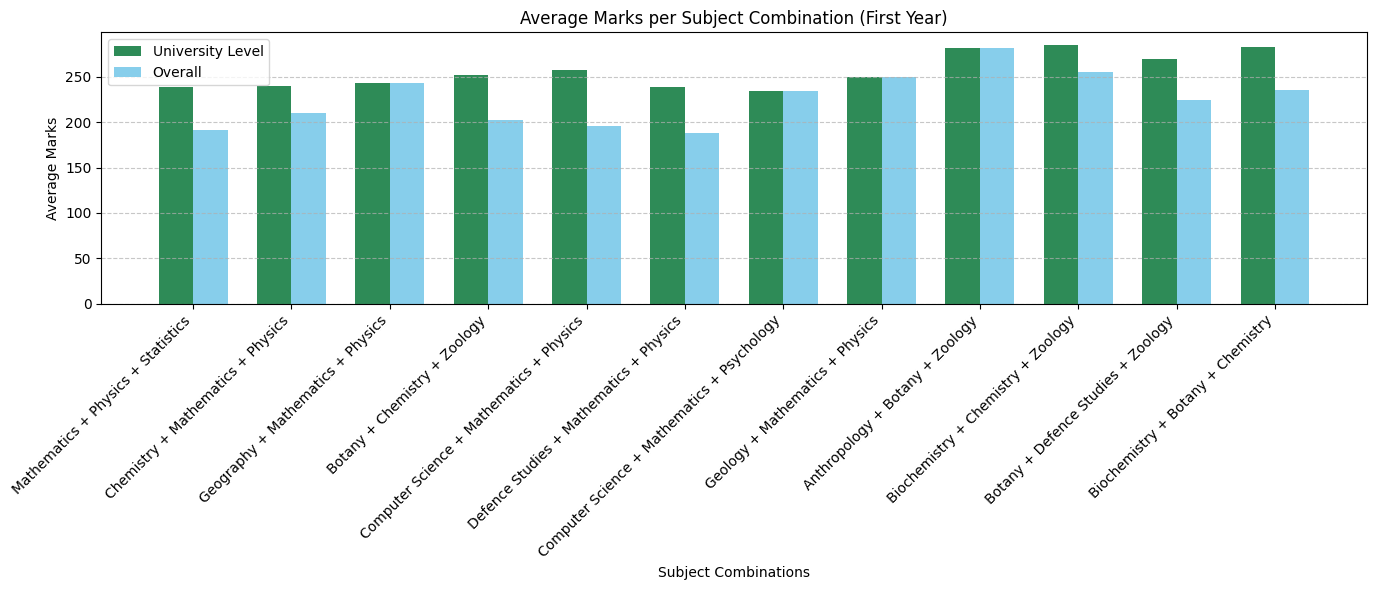

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create combination labels
univ_subject_avg['Combination'] = (
    univ_subject_avg['Subject 1'] + ' + ' +
    univ_subject_avg['Subject 2'] + ' + ' +
    univ_subject_avg['Subject 3']
)

all_subject_avg['Combination'] = (
    all_subject_avg['Subject 1'] + ' + ' +
    all_subject_avg['Subject 2'] + ' + ' +
    all_subject_avg['Subject 3']
)

# Merge dataframes on 'Combination'
merged = pd.merge(univ_subject_avg[['Combination', 'Average']],
                  all_subject_avg[['Combination', 'Average']],
                  on='Combination',
                  suffixes=('_University', '_Overall'))

# Data for plotting
combinations = merged['Combination']
x = np.arange(len(combinations))  # label locations
width = 0.35  # bar width

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, merged['Average_University'], width, label='University Level', color='seagreen')
plt.bar(x + width/2, merged['Average_Overall'], width, label='Overall', color='skyblue')

# Labels and title
plt.xlabel('Subject Combinations')
plt.ylabel('Average Marks')
plt.title('Average Marks per Subject Combination (First Year)')
plt.xticks(ticks=x, labels=combinations, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Second Year

In [16]:
# Import dataset

bsc2 = pd.read_excel('../DataSet/BSC2DADatasetFinal.xlsx',header=[1,2])  # Assuming your file has multi-level headers
bsc2

Student_Details                                                     \
              RollNo   EnrolNo Part1Total Part2Total GrandTotal  Result   
0            2307001  U2112626       247*        263        510  Passed   
1            2307002  U2112367        200        212        412  Passed   
2            2307003  U2112440       216*        244        460  Passed   
3            2307004  U2110207       204*        217        421  Passed   
4            2307005  U2112447       210*        153        363  Failed   
...              ...       ...        ...        ...        ...     ...   
1584         2311315  I2110654       232*        215        447  Failed   
1585         2311316  I2110658       231*        205        436  Passed   
1586         2311317  I2110710       228*        180        408  Failed   
1587         2311318  I2110114       224*        196        420  Elig/E   
1588         2311320  I2110144        189        173        362  Elig/E   

     Physics                                          \
      Optics Oscillation, Waves and Electromagnetism   
0         20                                      22   
1         17                                      19   
2         19                                      16   
3         --                                      --   
4          5                                       9   
...      ...                                     ...   
1584       7                                       8   
1585       7                                      12   
1586       3                                       4   
1587      22                                      15   
1588       5                                       4   

                                            ...    Zoology  \
     Atomic and Nuclear Physics Practicals  ... VERTEBRATA   
0                            14         30  ...         --   
1                            11         20  ...         --   
2                            19         22  ...         --   
3                            --         --  ...         16   
4                            12         15  ...         --   
...                         ...        ...  ...        ...   
1584                         16         32  ...         --   
1585                         16         31  ...         --   
1586                          2         33  ...         --   
1587                         16         AA  ...         --   
1588                          5         30  ...         --   

                                                            Geography  \
     GENETICS AND CELL BIOLOGY Practicals Regional Geography of World   
0                           --         --                          --   
1                           --         --                          --   
2                           --         --                          31   
3                           11         30                          --   
4                           --         --                          --   
...                        ...        ...                         ...   
1584                        --         --                          --   
1585                        --         --                          --   
1586                        --         --                          --   
1587                        --         --                          --   
1588                        --         --                          --   

                                        Geology                         \
     Geography of India PRACTICALS Paleontology Stratigraphy Petrology   
0                    --         --           --           --        --   
1                    --         --           --           --        --   
2                    29         37           --           --        --   
3                    --         --           --           --        --   
4                    --         --           --           --        --   
...                 ...  

In [25]:
import pandas as pd


bsc2 = pd.read_excel('../DataSet/BSC2DADataSetFinal.xlsx', header=[1, 2])
total=0
# Iterate through each student
for index, row in bsc2.iterrows():
    present_subjects = set()  # Subjects with at least one valid (non-NaN, not '--', not 'AA') subheading

    for subject, subheading in bsc2.columns:
        value = row[(subject, subheading)]

        # Check if the value is valid: not NaN, not '--', and not 'AA'
        if subject !="Student_Details" and pd.notna(value) and str(value).strip() not in ['0','UFM','--', 'AA']:
            present_subjects.add(subject)
            

    print(f"Student {index + 1} has valid marks in subjects: {present_subjects}")



Student 1 has valid marks in subjects: {'Mathematics', 'Physics', 'Statistics'}
Student 2 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 3 has valid marks in subjects: {'Mathematics', 'Physics', 'Geography'}
Student 4 has valid marks in subjects: {'Botany', 'Zoology', 'Chemistry'}
Student 5 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 6 has valid marks in subjects: {'Mathematics', 'Physics', 'Computer Science'}
Student 7 has valid marks in subjects: {'Mathematics', 'Physics', 'Geography'}
Student 8 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 9 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 10 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemistry'}
Student 11 has valid marks in subjects: {'Mathematics', 'Defence Studies', 'Physics'}
Student 12 has valid marks in subjects: set()
Student 13 has valid marks in subjects: {'Mathematics', 'Physics', 'Chemis

In [ ]:
import pandas as pd
import datetime

# Load your dataset
bsc2 = pd.read_excel('../DataSet/BSC2DADataSetFinal.xlsx', header=[1, 2])
sum_of_subs = {}
count_of_subs = {}
average_of_subs = {}
total_stud = 0

# Iterate through each student
for index, row in bsc2.iterrows():
    present_subjects = set()
    total_marks = 0
    count=0

    for subject, subheading in bsc2.columns:
        value = row[(subject, subheading)]

        if subject != "Student_Details" and pd.notna(value) and str(value).strip() not in ['0', 'UFM','--', 'AA']:
            present_subjects.add(subject)

            # Try converting value to float and add to total
            try:
                if not isinstance(value, (datetime.date, datetime.datetime)):
                    total_marks += float(value)
                    

            except ValueError:
                pass  # Ignore if conversion to number fails

        
    if len(present_subjects) == 3:
        key = tuple(sorted(present_subjects))
        total_stud +=1

        # Initialize if not exists
        if key not in sum_of_subs:
            sum_of_subs[key] = 0
            count_of_subs[key] = 0

        sum_of_subs[key] += total_marks
        count_of_subs[key] += 1


# print(sum_of_subs)

# for key,value in sum_of_subs.items():
#     print(f"{key}:{value}")

# print("\n\n")
# for key,value in count_of_subs.items():
#     print(f"{key}:{value}")

print("\n\n")
for key,value in average_of_subs.items():
    print(f"{key}:{value}")

print(total_stud)




('Mathematics', 'Physics', 'Statistics'):242.27710843373495
('Chemistry', 'Mathematics', 'Physics'):246.14465408805032
('Geography', 'Mathematics', 'Physics'):254.32
('Botany', 'Chemistry', 'Zoology'):260.3615107913669
('Computer Science', 'Mathematics', 'Physics'):224.65608465608466
('Defence Studies', 'Mathematics', 'Physics'):240.95098039215685
('Computer Science', 'Mathematics', 'Psychology'):245.21052631578948
('Geology', 'Mathematics', 'Physics'):274.0
('Anthropology', 'Botany', 'Zoology'):298.25
('Biochemistry', 'Chemistry', 'Zoology'):276.3125
('Biochemistry', 'Botany', 'Chemistry'):280.8
('Botany', 'Defence Studies', 'Zoology'):278.7037037037037
1555


In [24]:
import pandas as pd

# Create a list to store rows of the result
results = []

# Loop through the keys (which are subject combinations)
for key in sum_of_subs:
    total = sum_of_subs[key]
    count = count_of_subs[key]
    
    # Pad with empty strings if less than 3 subjects (just in case)
    subjects = list(key) + [""] * (3 - len(key))
    
    results.append({
        "Subject 1": subjects[0],
        "Subject 2": subjects[1],
        "Subject 3": subjects[2],
        "Total Marks": total,
        "Count": count
    })

# Create a DataFrame
df_results = pd.DataFrame(results)

# Save to Excel
df_results.to_excel("SubjectCombinationResults_SecondYear.xlsx", index=False)

#print("Results saved to 'SubjectCombinationResults.xlsx'")

In [10]:
# For university students only  ----> Not needed in this , Just want to check total number of students in university which are Pass/Fail
import pandas as pd
import datetime

# Load your dataset
bsc2 = pd.read_excel('../DataSet/BSC2DADataSetFinal.xlsx', header=[1, 2])
sum_of_subs2 = {}
count_of_subs2 = {}
total_stud = 0

# Iterate through each student
for index, row in bsc2.iterrows():
    present_subjects = set()
    total_marks = 0
    count=0

    flag = False

    for subject, subheading in bsc2.columns:
        value = row[(subject, subheading)]
        if subject == "Student_Details" and subheading == "EnrolNo" and str(value).startswith('U')==True:
            flag = True
            break

    for subject, subheading in bsc2.columns:
        value = row[(subject, subheading)]

        if subject != "Student_Details" and flag==True and pd.notna(value) and str(value).strip() not in ['0', '--','UFM' ,'AA']:
            present_subjects.add(subject)

            # Try converting value to float and add to total
            try:
                if not isinstance(value, (datetime.date, datetime.datetime)):
                    total_marks += float(value)
                    

            except ValueError:
                pass  # Ignore if conversion to number fails

        
    if len(present_subjects) == 3:
        key = tuple(sorted(present_subjects))
        total_stud +=1

        # Initialize if not exists
        if key not in sum_of_subs2:
            sum_of_subs2[key] = 0
            count_of_subs2[key] = 0

        sum_of_subs2[key] += total_marks
        count_of_subs2[key] += 1

# print(sum_of_subs)

for key,value in sum_of_subs2.items():
    print(f"{key}:{value}")

print("\n\n")
for key,value in count_of_subs2.items():
    print(f"{key}:{value}")

print(total_stud)

('Mathematics', 'Physics', 'Statistics'):6736.0
('Chemistry', 'Mathematics', 'Physics'):53595.0
('Geography', 'Mathematics', 'Physics'):6358.0
('Botany', 'Chemistry', 'Zoology'):42771.0
('Computer Science', 'Mathematics', 'Physics'):9872.0
('Defence Studies', 'Mathematics', 'Physics'):7640.0
('Computer Science', 'Mathematics', 'Psychology'):4659.0
('Geology', 'Mathematics', 'Physics'):4932.0
('Anthropology', 'Botany', 'Zoology'):3579.0
('Biochemistry', 'Chemistry', 'Zoology'):4078.0
('Biochemistry', 'Botany', 'Chemistry'):2050.0
('Botany', 'Defence Studies', 'Zoology'):4679.0



('Mathematics', 'Physics', 'Statistics'):26
('Chemistry', 'Mathematics', 'Physics'):202
('Geography', 'Mathematics', 'Physics'):25
('Botany', 'Chemistry', 'Zoology'):149
('Computer Science', 'Mathematics', 'Physics'):39
('Defence Studies', 'Mathematics', 'Physics'):30
('Computer Science', 'Mathematics', 'Psychology'):19
('Geology', 'Mathematics', 'Physics'):18
('Anthropology', 'Botany', 'Zoology'):12
('Biochemi

In [11]:
import pandas as pd

# Create a list to store rows of the result
results = []

# Loop through the keys (which are subject combinations)
for key in sum_of_subs2:
    total = sum_of_subs2[key]
    count = count_of_subs2[key]
    
    # Pad with empty strings if less than 3 subjects (just in case)
    subjects = list(key) + [""] * (3 - len(key))
    
    results.append({
        "Subject 1": subjects[0],
        "Subject 2": subjects[1],
        "Subject 3": subjects[2],
        "Total Marks": total,
        "Count": count
    })

# Create a DataFrame
df_results = pd.DataFrame(results)

# Save to Excel
df_results.to_excel("SubjectCombinationResults_SecondYear_Univ.xlsx", index=False)

#print("Results saved to 'SubjectCombinationResults.xlsx'")

In [8]:
univ_subject_avg2 = pd.read_excel('SubjectCombinationResults_SecondYear_Univ.xlsx',header=0)
univ_subject_avg2

,Subject 1,Subject 2,Subject 3,Total Marks,Count,Average
0,Mathematics,Physics,Statistics,6736,26,259.076923
1,Chemistry,Mathematics,Physics,53595,202,265.321782
2,Geography,Mathematics,Physics,6358,25,254.320000
3,Botany,Chemistry,Zoology,42771,149,287.053691
4,Computer Science,Mathematics,Physics,9872,39,253.128205
5,Defence Studies,Mathematics,Physics,7640,30,254.666667
6,Computer Science,Mathematics,Psychology,4659,19,245.210526
7,Geology,Mathematics,Physics,4932,18,274.000000
8,Anthropology,Botany,Zoology,3579,12,298.250000
9,Biochemistry,Chemistry,Zoology,4078,14,291.285714


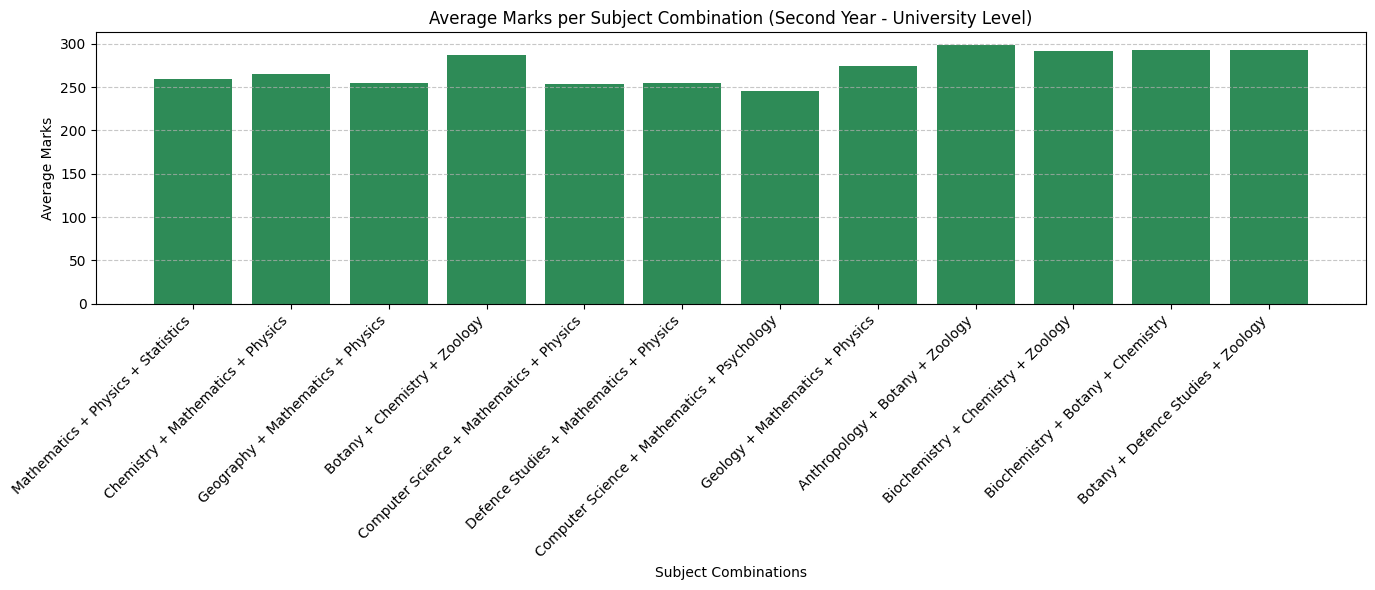

In [20]:
import matplotlib.pyplot as plt

# Create a new column for combined subject name
univ_subject_avg2['Combination'] = (
    univ_subject_avg2['Subject 1'] + ' + ' +
    univ_subject_avg2['Subject 2'] + ' + ' +
    univ_subject_avg2['Subject 3']
)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(univ_subject_avg2['Combination'], univ_subject_avg2['Average'], color='seagreen')

plt.xlabel('Subject Combinations')
plt.ylabel('Average Marks')
plt.title('Average Marks per Subject Combination (Second Year - University Level)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
all_subject_avg2 = pd.read_excel('SubjectCombinationResults_SecondYear.xlsx',header=0)
all_subject_avg2

,Subject 1,Subject 2,Subject 3,Total Marks,Count,Average
0,Mathematics,Physics,Statistics,20109,83,242.277108
1,Chemistry,Mathematics,Physics,117411,478,245.629707
2,Geography,Mathematics,Physics,6358,25,254.320000
3,Botany,Chemistry,Zoology,144761,560,258.501786
4,Computer Science,Mathematics,Physics,42460,189,224.656085
5,Defence Studies,Mathematics,Physics,24577,102,240.950980
6,Computer Science,Mathematics,Psychology,4659,19,245.210526
7,Geology,Mathematics,Physics,4932,18,274.000000
8,Anthropology,Botany,Zoology,3579,12,298.250000
9,Biochemistry,Chemistry,Zoology,8842,32,276.312500


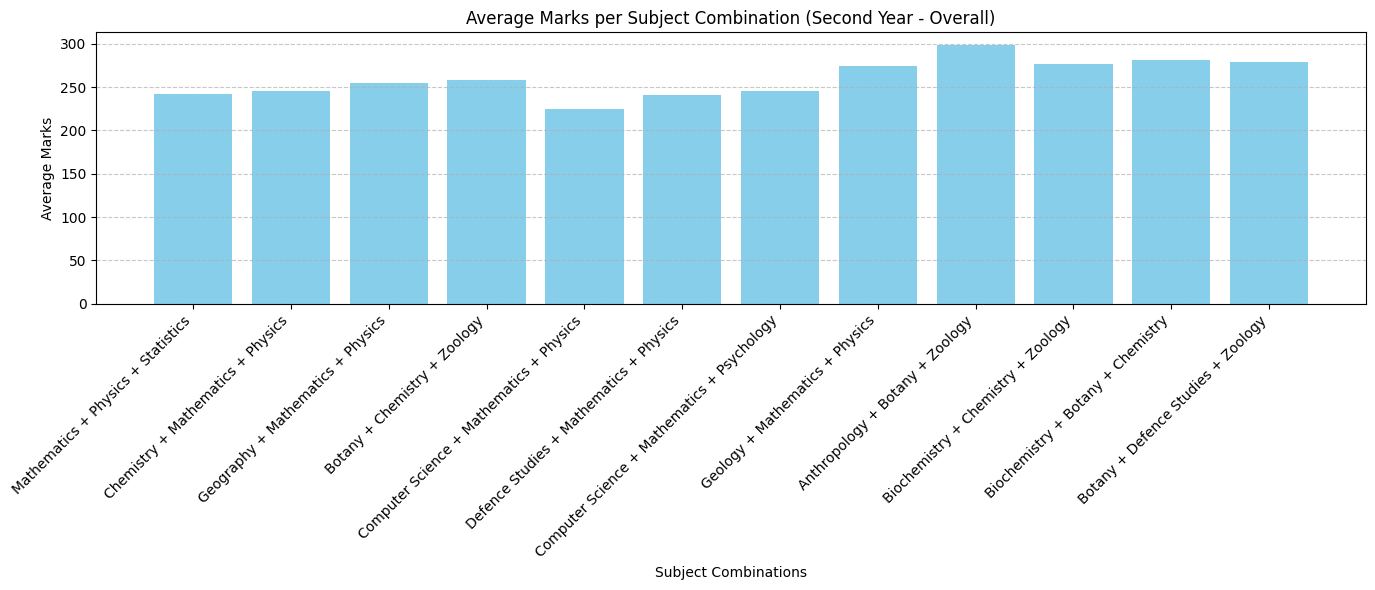

In [21]:
import matplotlib.pyplot as plt

# Create a new column for combined subject name
all_subject_avg2['Combination'] = (
    all_subject_avg2['Subject 1'] + ' + ' +
    all_subject_avg2['Subject 2'] + ' + ' +
    all_subject_avg2['Subject 3']
)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(all_subject_avg2['Combination'], all_subject_avg2['Average'], color='skyblue')

plt.xlabel('Subject Combinations')
plt.ylabel('Average Marks')
plt.title('Average Marks per Subject Combination (Second Year - Overall)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

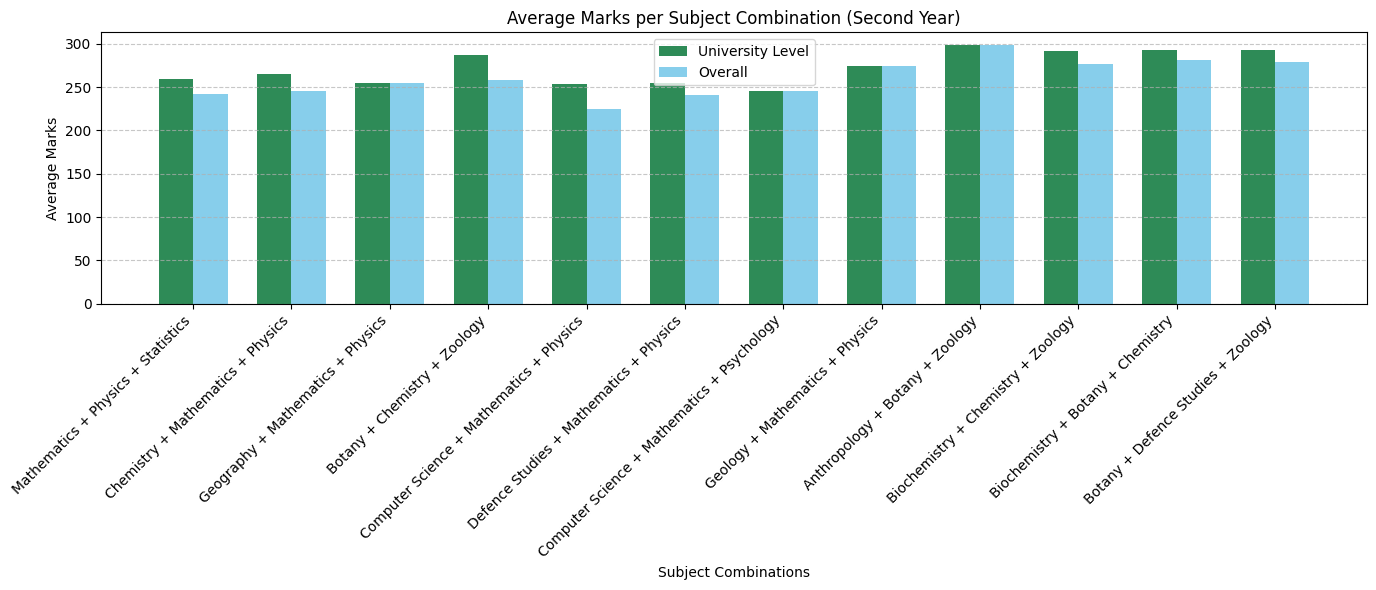

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create combination labels
univ_subject_avg2['Combination'] = (
    univ_subject_avg2['Subject 1'] + ' + ' +
    univ_subject_avg2['Subject 2'] + ' + ' +
    univ_subject_avg2['Subject 3']
)

all_subject_avg2['Combination'] = (
    all_subject_avg2['Subject 1'] + ' + ' +
    all_subject_avg2['Subject 2'] + ' + ' +
    all_subject_avg2['Subject 3']
)

# Merge dataframes on 'Combination'
merged = pd.merge(univ_subject_avg2[['Combination', 'Average']],
                  all_subject_avg2[['Combination', 'Average']],
                  on='Combination',
                  suffixes=('_University', '_Overall'))

# Data for plotting
combinations = merged['Combination']
x = np.arange(len(combinations))  # label locations
width = 0.35  # bar width

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, merged['Average_University'], width, label='University Level', color='seagreen')
plt.bar(x + width/2, merged['Average_Overall'], width, label='Overall', color='skyblue')

# Labels and title
plt.xlabel('Subject Combinations')
plt.ylabel('Average Marks')
plt.title('Average Marks per Subject Combination (Second Year)')
plt.xticks(ticks=x, labels=combinations, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()